In [278]:
# Import libraries section

import datetime 
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np
import pandas as pd

from matplotlib.pyplot import rcParams
from scipy import stats

In [259]:
# Size of plottings

rcParams['figure.figsize'] = 20,6

In [21]:
# Database connection



Uganda = pd.read_sql("SELECT * FROM platform_market_prices2 WHERE country = 'UGA'", con=conn)

conn.close()

In [22]:
# take a look of the dataset

Uganda.head()

,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
0,325345,InfoTrade,UGA,Kiboga,Cereals - Maize,Maize,Dry Maize,2019-02-11,600,550,UGX,kg,1,2019-02-13 02:10:32
1,325344,InfoTrade,UGA,Masindi,Beans,Beans,Yellow Beans,2019-02-11,3000,2800,UGX,kg,1,2019-02-13 01:50:33
2,325343,InfoTrade,UGA,Kiboga,Beans,Beans,Yellow Beans,2019-02-11,2200,1500,UGX,kg,1,2019-02-13 01:50:33
3,325342,InfoTrade,UGA,Kiboga,Animal Products,Animal Products - Other,Tilapia,2019-02-11,4400,4000,UGX,whole,1,2019-02-13 01:30:32
4,325341,InfoTrade,UGA,Masindi,Cereals - Other,Sorghum,Sorghum Grain,2019-02-11,1000,800,UGX,kg,1,2019-02-13 01:30:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41521,455453,InfoTrade,UGA,Masindi,Beans,Beans,Nambale Beans,2019-10-19,3000,2500,UGX,kg,1,2019-10-20 01:40:39
41522,455454,InfoTrade,UGA,Nakawa,Cereals - Rice,Rice,Upland Rice,2019-10-19,2800,2500,UGX,kg,1,2019-10-20 08:30:47
41523,455455,InfoTrade,UGA,Kalerwe,Cereals - Rice,Rice,Upland Rice,2019-10-19,3500,3000,UGX,kg,1,2019-10-20 08:30:47
41524,455456,InfoTrade,UGA,Nakasero,Cereals - Rice,Rice,Upland Rice,2019-10-19,3000,2500,UGX,kg,1,2019-10-20 08:30:48


In [24]:
# Checking how many unique values.
Uganda.nunique()

id             41526
source             3
country            1
market            31
product_cat       12
product_agg       25
product           87
date             816
retail           891
wholesale       1070
currency           2
unit               9
active             2
udate          11041
dtype: int64

In [32]:
# What sources we have?
set(Uganda['source'])

{'EAGC-RATIN', 'Farmgain', 'InfoTrade'}

### Focus first on EAGC-RATIN source.

In [34]:
# 

ratin = Uganda[Uganda['source'] == 'EAGC-RATIN']
ratin.head()

,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
7,325248,EAGC-RATIN,UGA,Tororo,Beans,Beans,Green Gram,2019-02-11,68,63,KES,1Kg,1,2019-02-11 06:23:27
8,325246,EAGC-RATIN,UGA,Kampala,Cereals - Rice,Rice,Imported Rice,2019-02-11,96,85,KES,1Kg,1,2019-02-11 06:23:27
9,325241,EAGC-RATIN,UGA,Kampala,Cereals - Maize,Maize,Maize Flour,2019-02-11,41,33,KES,1Kg,1,2019-02-11 06:23:21
10,325239,EAGC-RATIN,UGA,Owino,Cereals - Maize,Maize,Maize Flour,2019-02-11,41,34,KES,1Kg,1,2019-02-11 06:23:20
11,325236,EAGC-RATIN,UGA,Busia,Cereals - Maize,Maize,Dry Maize,2019-02-10,24,20,KES,1Kg,1,2019-02-11 06:23:17


In [35]:
# Check unique values

ratin.nunique()

id             16358
source             1
country            1
market            12
product_cat        6
product_agg       10
product           37
date             790
retail           688
wholesale        815
currency           2
unit               1
active             2
udate           8734
dtype: int64

In [37]:
# Two currencies?

print('Currencies in ratin info: ',set(ratin['currency']))
display(ratin[ratin['currency'] == 'KES'])
display(ratin[ratin['currency'] == 'UGX'])


Currencies in ratin info:  {'UGX', 'KES'}


,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
7,325248,EAGC-RATIN,UGA,Tororo,Beans,Beans,Green Gram,2019-02-11,68,63,KES,1Kg,1,2019-02-11 06:23:27
8,325246,EAGC-RATIN,UGA,Kampala,Cereals - Rice,Rice,Imported Rice,2019-02-11,96,85,KES,1Kg,1,2019-02-11 06:23:27
9,325241,EAGC-RATIN,UGA,Kampala,Cereals - Maize,Maize,Maize Flour,2019-02-11,41,33,KES,1Kg,1,2019-02-11 06:23:21
10,325239,EAGC-RATIN,UGA,Owino,Cereals - Maize,Maize,Maize Flour,2019-02-11,41,34,KES,1Kg,1,2019-02-11 06:23:20
11,325236,EAGC-RATIN,UGA,Busia,Cereals - Maize,Maize,Dry Maize,2019-02-10,24,20,KES,1Kg,1,2019-02-11 06:23:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41119,455039,EAGC-RATIN,UGA,Gulu,Cereals - Other,Sorghum,Red Sorghum,2019-10-17,28,20,KES,1Kg,1,2019-10-18 00:04:28
41120,455040,EAGC-RATIN,UGA,Masindi,Peas,Peas,Cowpeas,2019-10-17,98,84,KES,1Kg,1,2019-10-18 00:04:28
41121,455043,EAGC-RATIN,UGA,Masindi,Cereals - Other,Sorghum,Red Sorghum,2019-10-17,42,28,KES,1Kg,1,2019-10-18 00:04:29
41122,455051,EAGC-RATIN,UGA,Gulu,Peas,Peas,Cowpeas,2019-10-17,98,84,KES,1Kg,1,2019-10-18 00:04:38


,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
9201,303317,EAGC-RATIN,UGA,Kasese,Beans,Beans,Old Beans,2018-12-13,1595,1377,UGX,1Kg,1,2018-12-14 08:12:34
9202,303324,EAGC-RATIN,UGA,Kasese,Peas,Peas,Cowpeas,2018-12-14,3770,3697,UGX,1Kg,1,2018-12-14 08:12:34
9203,303332,EAGC-RATIN,UGA,Gulu,Cereals - Rice,Rice,Rice,2018-12-13,2501,2284,UGX,1Kg,1,2018-12-14 08:12:34
9204,303344,EAGC-RATIN,UGA,Kampala,Cereals - Maize,Maize,Dry Maize,2018-12-13,797,616,UGX,1Kg,1,2018-12-14 08:12:34
9205,303348,EAGC-RATIN,UGA,Soroti,Peas,Peas,Cowpeas,2018-12-13,1994,1776,UGX,1Kg,1,2018-12-14 08:12:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,311333,EAGC-RATIN,UGA,Kasese,Peas,Peas,Cowpeas,2019-01-08,4315,3986,UGX,1Kg,1,2019-01-08 02:30:01
11426,311336,EAGC-RATIN,UGA,Busia,Beans,Beans,Mixed Beans,2019-01-08,1682,1573,UGX,1Kg,1,2019-01-08 02:30:01
11427,311339,EAGC-RATIN,UGA,Kasese,Beans,Beans,Soya beans,2019-01-08,1792,1682,UGX,1Kg,1,2019-01-08 02:30:01
11428,311343,EAGC-RATIN,UGA,Busia,Cereals - Other,Sorghum,Red Sorghum,2019-01-08,914,768,UGX,1Kg,1,2019-01-08 02:30:01


Both curriencies are in some products, so better to try another way. What about focusing in a product by now.

In [39]:
# What products do we have?

set(ratin['product'])

{'Barley',
 'Black Beans (Dolichos)',
 'Chic Pea',
 'Cow Peas',
 'Cowpeas',
 'Dry Maize',
 'Dry Peas',
 'Green Gram',
 'Green Peas',
 'Ground Nuts',
 'Imported Rice',
 'Kahama Rice',
 'Kidney Beans',
 'Kilombero Rice',
 'Maize',
 'Maize Bran',
 'Maize Flour',
 'Maize Meal',
 'Mbeya Rice',
 'Millet',
 'Millet Grain',
 'Mixed Beans',
 'Morogoro Rice',
 'Old Beans',
 'Pigeon Peas',
 'Red Beans',
 'Red Sorghum',
 'Rice',
 'Rice Bran',
 'Sorghum Flour',
 'Soya Beans',
 'Soya beans',
 'Sunflower Seed Cake',
 'Unprocessed/husked rice',
 'Wheat',
 'White Beans',
 'Yellow Beans'}

In [43]:
# Choosing maize products.

maize = ratin[ratin['product'].str.contains('Maize')]
print(maize.shape)
maize.head()

(2672, 14)


,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
9,325241,EAGC-RATIN,UGA,Kampala,Cereals - Maize,Maize,Maize Flour,2019-02-11,41,33,KES,1Kg,1,2019-02-11 06:23:21
10,325239,EAGC-RATIN,UGA,Owino,Cereals - Maize,Maize,Maize Flour,2019-02-11,41,34,KES,1Kg,1,2019-02-11 06:23:20
11,325236,EAGC-RATIN,UGA,Busia,Cereals - Maize,Maize,Dry Maize,2019-02-10,24,20,KES,1Kg,1,2019-02-11 06:23:17
15,325227,EAGC-RATIN,UGA,Tororo,Cereals - Maize,Maize,Maize Flour,2019-02-11,38,27,KES,1Kg,1,2019-02-11 06:23:12
18,325216,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2019-02-11,27,22,KES,1Kg,1,2019-02-11 06:22:58


In [44]:
# Now let's into this data

#What markets do we have?

set(maize['market'])

{'Busia',
 'Gulu',
 'Kabale',
 'Kampala',
 'Kapchorwa',
 'Kasese',
 'Lira',
 'Masindi',
 'Mbale',
 'Owino',
 'Soroti',
 'Tororo'}

In [111]:
# I'm choosing lira, as a start.

maize_lira = maize[maize['market'] == 'Lira']
print(maize_lira.shape)

# Order the data by date if aren't already.

maize_lira = maize_lira.sort_values(by='date')
maize_lira = maize_lira.reset_index(drop=True)

maize_lira.head()

(336, 14)


,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
0,382978,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-01-18,57,51,KES,1Kg,1,2019-04-20 10:41:15
1,381255,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-01-22,51,45,KES,1Kg,1,2019-04-20 10:39:25
2,387210,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-01-31,51,45,KES,1Kg,1,2019-04-23 09:46:25
3,382102,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-02-06,50,45,KES,1Kg,1,2019-04-20 10:40:15
4,387156,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-02-19,50,45,KES,1Kg,1,2019-04-23 09:46:20


In [47]:
# Check for unique values.
maize_lira.nunique()

id             336
source           1
country          1
market           1
product_cat      1
product_agg      1
product          5
date           182
retail          53
wholesale       63
currency         2
unit             1
active           2
udate          330
dtype: int64

In [112]:
# Two currencies?

print(maize_lira[maize_lira['currency'] == 'KES'].shape)
display(maize_lira[maize_lira['currency'] == 'KES'])
print(maize_lira[maize_lira['currency'] == 'UGX'].shape)
display(maize_lira[maize_lira['currency'] == 'UGX'])

(331, 14)


,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
0,382978,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-01-18,57,51,KES,1Kg,1,2019-04-20 10:41:15
1,381255,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-01-22,51,45,KES,1Kg,1,2019-04-20 10:39:25
2,387210,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-01-31,51,45,KES,1Kg,1,2019-04-23 09:46:25
3,382102,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-02-06,50,45,KES,1Kg,1,2019-04-20 10:40:15
4,387156,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-02-19,50,45,KES,1Kg,1,2019-04-23 09:46:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,451232,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2019-10-08,34,27,KES,1Kg,1,2019-10-10 13:51:08
332,452035,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2019-10-14,34,27,KES,1Kg,1,2019-10-14 04:37:09
333,453941,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2019-10-15,34,27,KES,1Kg,1,2019-10-16 06:29:10
334,453761,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2019-10-16,34,28,KES,1Kg,1,2019-10-16 06:20:33


(5, 14)


,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
32,305429,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2018-12-13,797,616,UGX,1Kg,1,2018-12-16 00:15:17
34,303486,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2018-12-13,797,616,UGX,1Kg,1,2018-12-14 08:12:35
36,306085,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2018-12-17,798,544,UGX,1Kg,1,2018-12-17 12:59:23
45,309128,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2018-12-28,1494,984,UGX,1Kg,1,2018-12-29 03:59:41
47,311215,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-01-07,1499,987,UGX,1Kg,1,2019-01-08 02:30:00


In [113]:
# Wondering if we have the data of the dates in UGX prices.

valuable_dates_in_UGX = []
dates_with_UGX_currency = list(maize_lira[maize_lira['currency'] == 'UGX']['date'])
dates_with_KES_currency = list(maize_lira[maize_lira['currency'] == 'KES']['date'])


for i in range(len(list(maize_lira[maize_lira['currency'] == 'UGX']['date']))):
    if dates_with_UGX_currency[i] not in dates_with_KES_currency:
        valuable_dates_in_UGX.append(dates_with_UGX_currency[i])

valuable_dates_in_UGX

[]

In [114]:
# If the list doesn't have any date, get rid of those rows.

if not valuable_dates_in_UGX:
    maize_lira = maize_lira.drop(labels=list(maize_lira[maize_lira['currency'] == 'UGX'].index),axis=0)
    maize_lira = maize_lira.reset_index(drop=True)
else:
    #TO DO, convert the prices to KES
    pass


In [123]:
# Looking for duplicated values

maize_lira[maize_lira.duplicated(['date','product'],keep=False)].head(50)

,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
32,304678,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2018-12-13,22,17,KES,1Kg,1,2018-12-16 00:13:14
33,302735,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Dry Maize,2018-12-13,22,17,KES,1Kg,1,2018-12-14 08:09:39
70,322322,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-02-04,356,274,KES,1Kg,1,2019-02-04 08:26:11
71,324739,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-02-04,36,27,KES,1Kg,1,2019-02-10 02:13:21
72,324351,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-02-05,35,25,KES,1Kg,1,2019-02-10 02:12:41
73,322862,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-02-05,356,246,KES,1Kg,1,2019-02-05 08:13:16
175,398387,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-02,486,432,KES,1Kg,1,2019-05-16 05:34:45
176,391030,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-02,48,43,KES,1Kg,1,2019-05-02 05:19:07
179,392649,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-03,54,46,KES,1Kg,1,2019-05-06 02:51:02
180,397835,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-03,537,457,KES,1Kg,1,2019-05-16 05:33:57


In [124]:
# Since the upper results, I'll divide them by maize presentation.

set(maize_lira['product'])

{'Dry Maize', 'Maize', 'Maize Bran', 'Maize Flour', 'Maize Meal'}

In [179]:

dummy = {i:np.nan for i in set(maize_lira['product'])}
for description in list(dummy.keys()):
    dummy[description] = maize_lira[maize_lira['product'] == description].set_index('date')['retail'].apply(lambda x: x/10 if x>100 else x)

for i in range(len(set(dummy.keys()))):
    print(list(dummy.keys())[i])
    display(dummy[list(dummy.keys())[i]])
    display(dummy[list(dummy.keys())[i]].min())

Maize Meal


date
2019-06-13    54
2019-06-14    59
2019-06-20    60
2019-06-21    60
2019-06-25    61
2019-06-26    60
2019-06-27    60
2019-06-28    59
2019-07-22    33
Name: retail, dtype: int64

33

Dry Maize


date
2018-12-11    22.0
2018-12-12    22.0
2018-12-13    22.0
2018-12-13    22.0
2018-12-17    22.0
              ... 
2019-10-08    34.0
2019-10-14    34.0
2019-10-15    34.0
2019-10-16    34.0
2019-10-17    34.0
Name: retail, Length: 151, dtype: float64

21.9

Maize Flour


date
2018-01-18    57.0
2018-01-22    51.0
2018-01-31    51.0
2018-02-06    50.0
2018-02-19    50.0
              ... 
2019-06-27    60.0
2019-06-28    59.0
2019-06-28    59.8
2019-07-22    32.8
2019-07-22    33.0
Name: retail, Length: 165, dtype: float64

32.8

Maize


date
2019-08-19    56
2019-08-20    28
2019-08-23    28
2019-08-26    28
2019-08-28    28
Name: retail, dtype: int64

28

Maize Bran


date
2019-08-14    70
Name: retail, dtype: int64

70

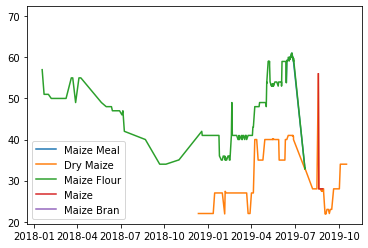

In [173]:
for i in range(len(set(dummy.keys()))):
#     display(dummy[list(dummy.keys())[i]].set_index('date'))
    plt.plot(dummy[list(dummy.keys())[i]], label = list(dummy.keys())[i])
plt.legend(loc='best')
plt.show()

In [315]:
i = 0
print(list(dummy.keys())[i])
plt.plot(dummy[list(dummy.keys())[i]], label = list(dummy.keys())[i])
del i

NameError: name 'dummy' is not defined

In [266]:
# For the sake of this I'll choosing just Maize Flour and look how well
# and foward we could get.

maize_flour_lira = maize_lira[maize_lira['product'] == 'Maize Flour']

# Check for duplicates in dates.

print(maize_flour_lira[maize_flour_lira.duplicated(['date','product'],keep=False)].shape)
maize_flour_lira[maize_flour_lira.duplicated(['date'],keep=False)].head(50)

(47, 14)


,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
70,322322,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-02-04,356,274,KES,1Kg,1,2019-02-04 08:26:11
71,324739,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-02-04,36,27,KES,1Kg,1,2019-02-10 02:13:21
72,324351,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-02-05,35,25,KES,1Kg,1,2019-02-10 02:12:41
73,322862,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-02-05,356,246,KES,1Kg,1,2019-02-05 08:13:16
175,398387,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-02,486,432,KES,1Kg,1,2019-05-16 05:34:45
176,391030,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-02,48,43,KES,1Kg,1,2019-05-02 05:19:07
179,392649,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-03,54,46,KES,1Kg,1,2019-05-06 02:51:02
180,397835,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-03,537,457,KES,1Kg,1,2019-05-16 05:33:57
183,398850,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-07,591,484,KES,1Kg,1,2019-05-16 05:35:31
184,393299,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-07,59,48,KES,1Kg,1,2019-05-07 02:19:56


It seems that someone has corrected the 'typos'. So we'll take them out.

In [267]:
maize_flour_lira_d = maize_flour_lira[maize_flour_lira.duplicated(['date','product'],keep=False)]
maize_flour_lira = maize_flour_lira.drop(labels=list(maize_flour_lira_d[maize_flour_lira_d['retail'] > 199].index), axis=0)
maize_flour_lira[maize_flour_lira.duplicated(['date'],keep=False)].head(50)

,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
189,395327,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-09,59,48,KES,1Kg,1,2019-05-10 05:51:33
191,394710,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-05-09,58,48,KES,1Kg,1,2019-05-09 05:00:20
234,404226,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-06-03,54,48,KES,1Kg,1,2019-06-04 04:31:46
236,403632,EAGC-RATIN,UGA,Lira,Cereals - Maize,Maize,Maize Flour,2019-06-03,53,48,KES,1Kg,1,2019-06-03 05:25:32


In [268]:
# We still have duplicated dates, so I'll be getting rid of them.

maize_flour_lira = maize_flour_lira.drop(labels=list(maize_flour_lira[maize_flour_lira.duplicated(['date'],keep='last')].index), axis=0)
maize_flour_lira[maize_flour_lira.duplicated(['date'],keep=False)].head(50)

,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate


In [269]:
# Hopefully we have "a fisrt cleaned data".
# Let's see what about the gaps between the dates with info.

maize_flour_lira = maize_flour_lira[['date','retail','wholesale']]
maize_flour_lira.nunique()

date         141
retail        23
wholesale     26
dtype: int64

In [270]:
# maize_flour_lira['date'].max()
# datetime.date.weekday(maize_flour_lira['date'].max())
maize_flour_lira['date'].max() + datetime.timedelta(days=(5 - datetime.date.weekday(maize_flour_lira['date'].max()))) 

Timestamp('2019-07-27 00:00:00')

In [271]:
### Define a function that set the date column as a index and insert missing dates.

def date_filler(dataframe):
    
    ''' 
    Make a dataframe with the last Sunday before the dates of the input dataframe, and the saturday of the last week in within the dates.
    Then Merge both dataframes to have one with all the possible weeks within the dates of the original dataframe.
    '''
    if datetime.date.weekday(maize_flour_lira['date'].min()) == 6:
        start = datetime.date.weekday(maize_flour_lira['date'].min())
    else:
        start = maize_flour_lira['date'].min() - datetime.timedelta(days=datetime.date.weekday(maize_flour_lira['date'].min()) + 1)
    if datetime.date.weekday(maize_flour_lira['date'].max()) == 5:
        end = datetime.date.weekday(maize_flour_lira['date'].min())
    else:
        end = maize_flour_lira['date'].max() + datetime.timedelta(days=(5 - datetime.date.weekday(maize_flour_lira['date'].max())))
        
    dummy = pd.DataFrame()
    dummy['dates'] = pd.date_range(start=start, end=end)
    dummy = dummy.set_index('dates')
    dataframe = dataframe.set_index('date')
    dataframe = dummy.merge(dataframe,how='outer',left_index=True, right_index=True)
    del dummy
    return dataframe
    


In [ ]:
# dummy = pd.DataFrame()
# dummy['dates'] = pd.date_range(start='2/23/2011', end='3/29/2020')
# dummy = dummy.set_index('dates')
# lira = dummy.merge(lira, how='outer', left_index=True, right_index=True)
# print(dummy.shape)
# lira.shape

In [272]:
daily_maize_flour_lira = date_filler(maize_flour_lira)
print(daily_maize_flour_lira.shape)
print('Portion of null values: ', round(daily_maize_flour_lira['retail'].isnull().sum()/len(daily_maize_flour_lira)*100,4), '%')
daily_maize_flour_lira

(560, 2)
Portion of null values:  74.8214 %


,retail,wholesale
2018-01-14,NaN,NaN
2018-01-15,NaN,NaN
2018-01-16,NaN,NaN
2018-01-17,NaN,NaN
2018-01-18,57.0,51.0
...,...,...
2019-07-23,NaN,NaN
2019-07-24,NaN,NaN
2019-07-25,NaN,NaN
2019-07-26,NaN,NaN


In [275]:
# We got outliers.

daily_maize_flour_lira.describe()

,retail,wholesale
count,141.000000,141.000000
mean,48.666667,39.751773
std,27.212305,19.449993
min,33.000000,24.000000
25%,41.000000,31.000000
50%,47.000000,40.000000
75%,54.000000,48.000000
max,356.000000,246.000000


In [284]:
# Finding outliers

z = np.abs(stats.zscore(daily_maize_flour_lira['retail'], nan_policy='omit'))

dates_to_drop = [daily_maize_flour_lira.iloc[i:i+1,:].index[0] for i in list(np.where(z>4)[0])]
dates_to_drop = dates_to_drop + list(daily_maize_flour_lira[daily_maize_flour_lira['retail'] <= 0].index)
daily_maize_flour_lira = daily_maize_flour_lira.drop(dates_to_drop, axis=0)
daily_maize_flour_lira.describe()

# Improvable: correct the outliers if they are clearly a typo.

C:\Users\jcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


,retail,wholesale
count,140.000000,140.000000
mean,46.471429,38.278571
std,7.839618,8.532686
min,33.000000,24.000000
25%,41.000000,31.000000
50%,47.000000,40.000000
75%,53.250000,48.000000
max,61.000000,51.000000


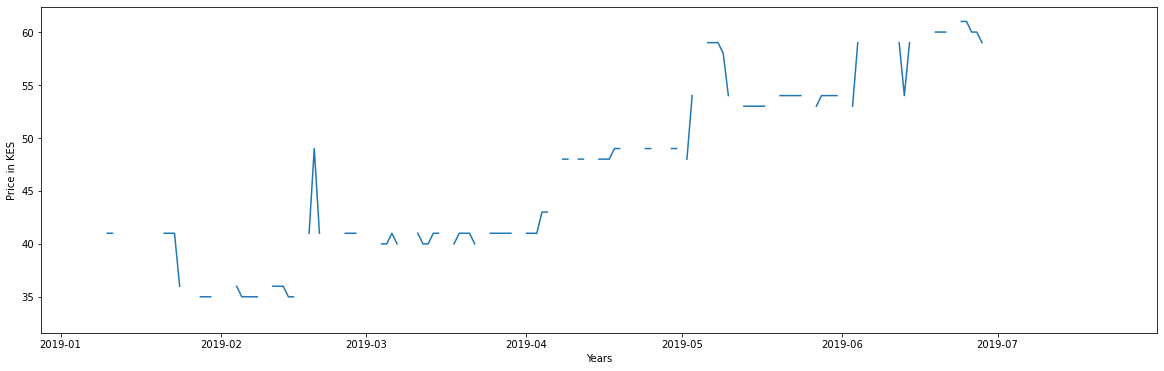

In [286]:
plt.plot(daily_maize_flour_lira['retail'].loc['2019-1-1':], label = 'Maize Price')


plt.xlabel('Years')
plt.ylabel('Price in KES')
plt.show()

In [313]:
### Setting last 7, 15 and 30 days average and label the day as end of week, fortnight or month.

def average_n_day_labeling(dataframe,column):
    
    '''
    Setting last 7, 15 and 30 days average and label the day as end of week, fortnight or month.
    '''
    
    dataframe['last_7_avg'] = dataframe[column].rolling(window=7,min_periods=1).mean()
    dataframe['last_15_avg'] = dataframe[column].rolling(window=15,min_periods=1).mean()
    dataframe['last_30_avg'] = dataframe[column].rolling(window=30,min_periods=1).mean()
    dataframe['last_7_std'] = dataframe[column].rolling(window=7,min_periods=2).std()
    dataframe['last_15_std'] = dataframe[column].rolling(window=15,min_periods=2).std()
    dataframe['last_30_std'] = dataframe[column].rolling(window=30,min_periods=2).std()
    
    
    return(dataframe)


In [314]:
result = average_n_day_labeling(daily_maize_flour_lira,'retail')
result.head(50)

,retail,wholesale,last_7_avg,last_15_avg,last_30_avg,last_7_std,last_15_std,last_30_std
2018-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-18,57.0,51.0,57.0,57.0,57.000000,NaN,NaN,NaN
2018-01-19,NaN,NaN,57.0,57.0,57.000000,NaN,NaN,NaN
2018-01-20,NaN,NaN,57.0,57.0,57.000000,NaN,NaN,NaN
2018-01-21,NaN,NaN,57.0,57.0,57.000000,NaN,NaN,NaN
2018-01-22,51.0,45.0,54.0,54.0,54.000000,4.242641,4.242641,4.242641e+00
2018-01-23,NaN,NaN,54.0,54.0,54.000000,4.242641,4.242641,4.242641e+00


In [288]:
daily_maize_flour_lira

,retail,wholesale
2018-01-14,NaN,NaN
2018-01-15,NaN,NaN
2018-01-16,NaN,NaN
2018-01-17,NaN,NaN
2018-01-18,57.0,51.0
...,...,...
2019-07-23,NaN,NaN
2019-07-24,NaN,NaN
2019-07-25,NaN,NaN
2019-07-26,NaN,NaN


# Draft

In [ ]:
dictionary = {
  "Dry Maize": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Green Maize": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Finger Millet": { "productagg":"Millet", "productcat":"Cereals - Other"},
  "Bulrush Millet": { "productagg":"Millet", "productcat":"Cereals - Other"},
  "Sorghum": { "productagg":"Sorghum", "productcat":"Cereals - Other"},
  "Wheat": { "productagg":"Wheat", "productcat":"Cereals - Other"},
  "Barley": { "productagg":"Barley", "productcat":"Cereals - Other"},
  "Beans Canadian": { "productagg":"Beans", "productcat":"Beans"},
  "Beans (K132)": { "productagg":"Beans", "productcat":"Beans"},
  "Beans Rosecoco": { "productagg":"Beans", "productcat":"Beans"},
  "Beans Mwitemania": { "productagg":"Beans", "productcat":"Beans"},
  "Old Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Mwezi Moja": { "productagg":"Beans", "productcat":"Beans"},
  "Dolichos (Njahi)": { "productagg":"Beans", "productcat":"Beans"},
  "Green Gram": { "productagg":"Beans", "productcat":"Beans"},
  "Cowpeas": { "productagg":"Peas", "productcat":"Peas"},
  "Fresh Peas": { "productagg":"Peas", "productcat":"Peas"},
  "Groundnuts": { "productagg":"Nuts", "productcat":"Seeds & Nuts"},
  "Red Irish Potatoes": { "productagg":"Potatoes", "productcat":"Roots & Tubers"},
  "Round Potatoes": { "productagg":"Potatoes", "productcat":"Roots & Tubers"},
  "White Irish Potatoes": { "productagg":"Potatoes", "productcat":"Roots & Tubers"},
  "Cassava Fresh": { "productagg":"Cassava", "productcat":"Roots & Tubers"},
  "Cassava Chips": { "productagg":"Cassava", "productcat":"Roots & Tubers"},
  "Sweet Potatoes": { "productagg":"Potatoes", "productcat":"Roots & Tubers"},
  "Cabbages": { "productagg":"Cabbages", "productcat":"Vegetables"},
  "Cooking Bananas": { "productagg":"Bananas", "productcat":"Fruits"},
  "Ripe Bananas": { "productagg":"Bananas", "productcat":"Fruits"},
  "Carrots": { "productagg":"Carrots", "productcat":"Vegetables"},
  "Tomatoes": { "productagg":"Tomatoes", "productcat":"Vegetables"},
  "Onions Dry": { "productagg":"Onions", "productcat":"Vegetables"},
  "Ginger": { "productagg":"Ginger", "productcat":"Vegetables"},
  "Spring Onions": { "productagg":"Onions", "productcat":"Vegetables"},
  "Chillies": { "productagg":"Chillies", "productcat":"Vegetables"},
  "Cucumber": { "productagg":"Cucumber", "productcat":"Vegetables"},
  "Capsicums": { "productagg":"Capsicums", "productcat":"Vegetables"},
  "Brinjal/Eggplant": { "productagg":"Brinjals", "productcat":"Vegetables"},
  "Cauliflower": { "productagg":"Cauliflower", "productcat":"Vegetables"},
  "Lettuce": { "productagg":"Lettuce", "productcat":"Vegetables"},
  "Passion Fruits": { "productagg":"Fruits", "productcat":"Fruits"},
  "Oranges": { "productagg":"Oranges", "productcat":"Fruits"},
  "Lemons": { "productagg":"Lemons", "productcat":"Fruits"},
  "Mangoes Local": { "productagg":"Mangoes", "productcat":"Fruits"},
  "Mangoes Ngowe": { "productagg":"Mangoes", "productcat":"Fruits"},
  "Limes": { "productagg":"Limes", "productcat":"Fruits"},
  "Pineapples": { "productagg":"Pineapples", "productcat":"Fruits"},
  "Pawpaw": { "productagg":"Pawpaw", "productcat":"Fruits"},
  "Avocado": { "productagg":"Avocado", "productcat":"Fruits"},
  "Kales": { "productagg":"Kales", "productcat":"Vegetables"},
  "Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Cow Peas": { "productagg":"Peas", "productcat":"Peas"},
  "Chic Pea": { "productagg":"Peas", "productcat":"Peas"},
  "Imported Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Maize": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Maize Bran": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Maize Meal": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Millet": { "productagg":"Millet", "productcat":"Cereals - Other"},
  "Mixed Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Peas": { "productagg":"Peas", "productcat":"Peas"},
  "Green Peas": { "productagg":"Peas", "productcat":"Peas"},
  "Pigeon Peas": { "productagg":"Peas", "productcat":"Peas"},
  "Red Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Kilombero Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Kahama Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Soya Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Yellow Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Kidney Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Agwedde Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Apple Bananas": { "productagg":"Bananas", "productcat":"Fruits"},
  "Beef": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Cassava Flour": { "productagg":"Cassava", "productcat":"Roots & Tubers"},
  "Cavendish": { "productagg":"Bananas", "productcat":"Fruits"},
  "Cavendish (Bogoya)": { "productagg":"Bananas", "productcat":"Fruits"},
  "Coffee": { "productagg":"Coffee", "productcat":"Other"},
  "Coffee (Arabica)": { "productagg":"Coffee", "productcat":"Other"},
  "Coffee (Robusta)": { "productagg":"Coffee", "productcat":"Other"},
  "Dry Fermented Cassava": { "productagg":"Cassava", "productcat":"Roots & Tubers"},
  "Exotic Chicken": { "productagg":"Poultry", "productcat":"Animal Products"},
  "Exotic Eggs": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Goat Meat": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Irish Potatoes": { "productagg":"Potatoes", "productcat":"Roots & Tubers"},
  "Kayiso Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Mbeya Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Morogoro Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Rice Bran": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Local Chicken": { "productagg":"Poultry", "productcat":"Animal Products"},
  "Local Eggs": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Maize Flour": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Maize Grain": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Milk": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Millet Flour": { "productagg":"Millet", "productcat":"Cereals - Other"},
  "Millet Grain": { "productagg":"Millet", "productcat":"Cereals - Other"},
  "Nambale Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Nile Perch": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Pork": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Processed Honey": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Simsim": { "productagg":"Simsim", "productcat":"Seeds & Nuts"},
  "Sorghum Grain": { "productagg":"Sorghum", "productcat":"Cereals - Other"},
  "Red Sorghum": { "productagg":"Sorghum", "productcat":"Cereals - Other"},
  "Sun Dried Cassava": { "productagg":"Cassava", "productcat":"Roots & Tubers"},
  "Sunflower Seed": { "productagg":"Sunflowers", "productcat":"Seeds & Nuts"},
  "Sunflower Seed Cake": { "productagg":"Sunflowers", "productcat":"Seeds & Nuts"},
  "Sunflower Seed Meal": { "productagg":"Sunflowers", "productcat":"Seeds & Nuts"},
  "Super Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Tilapia": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Tobacco": { "productagg":"Tobacco", "productcat":"Other"},
  "Turkey": { "productagg":"Poultry", "productcat":"Animal Products"},
  "Unprocessed Cotton": { "productagg":"Cotton", "productcat":"Other"},
  "Unprocessed Honey": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Unprocessed Tea": { "productagg":"Tea", "productcat":"Other"},
  "Unprocessed Vanilla": { "productagg":"Vanilla", "productcat":"Other"},
  "Upland Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Unprocessed/husked rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "White Fleshed Sweet Potatoes": { "productagg":"Potatoes", "productcat":"Roots & Tubers"},
  "Wheat Flour": { "productagg":"Wheat", "productcat":"Cereals - Other"},
  "Sorghum Flour": { "productagg":"Sorghum", "productcat":"Cereals - Other"},
  "Wheat Bran": { "productagg":"Wheat", "productcat":"Cereals - Other"},
  "Pearl Millet": { "productagg":"Millet", "productcat":"Cereals - Other"},
  "White Millet": { "productagg":"Millet", "productcat":"Cereals - Other"},
  "White Sorghum": { "productagg":"Sorghum", "productcat":"Cereals - Other"},
  "Black Beans (Dolichos)": { "productagg":"Beans", "productcat":"Beans"},
  "White Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Dry Peas": { "productagg":"Peas", "productcat":"Peas"},
  "Paddy Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Oranges": { "productagg":"Oranges", "productcat":"Fruits"},
  "Guavas": { "productagg":"Guavas", "productcat":"Fruits"},
  "Sorghum": { "productagg":"Sorghum", "productcat":"Cereals - Other"},
  "Cabbages": { "productagg":"Cabbages", "productcat":"Vegetables"},
  "Passion Fruits": { "productagg":"Passion Fruits", "productcat":"Fruits"},
  "Avocado": { "productagg":"Avocado", "productcat":"Fruits"},
  "Beet Roots": { "productagg":"Beet Roots", "productcat":"Roots & Tubers"},
  "Ditane": { "productagg":"Pesticides", "productcat":"Farm Inputs"},
  "Spinach": { "productagg":"Spinach", "productcat":"Vegetables"},
  "Maize": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Pumpkins": { "productagg":"Pumpkins", "productcat":"Vegetables"},
  "Sweet Potatoes": { "productagg":"Potatoes", "productcat":"Roots & Tubers"},
  "Irish Potatoes": { "productagg":"Potatoes", "productcat":"Roots & Tubers"},
  "Eggplant": { "productagg":"Eggplant", "productcat":"Vegetables"},
  "Black Beans (Dolichos)": { "productagg":"Beans", "productcat":"Beans"},
  "Cooking Bananas": { "productagg":"Bananas", "productcat":"Fruits"},
  "Green Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Red Onions": { "productagg":"Onions", "productcat":"Vegetables"},
  "White Onions": { "productagg":"Onions", "productcat":"Vegetables"},
  "Sorghum Flour": { "productagg":"Sorghum", "productcat":"Cereals - Other"},
  "Maize Flour": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Imported Maize": { "productagg":"Maize", "productcat":"Cereals - Maize"},
  "Cassava Flour": { "productagg":"Cassava", "productcat":"Roots & Tubers"},
  "Wheat Flour": { "productagg":"Wheat", "productcat":"Cereals - Other"},
  "Eggs": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Banana Bunch": { "productagg":"Bananas", "productcat":"Fruits"},
  "Goats": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Bull": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Sweet Bananas": { "productagg":"Bananas", "productcat":"Fruits"},
  "French Beans": { "productagg":"Beans", "productcat":"Beans"},
  "Mangoes Local": { "productagg":"Mangoes", "productcat":"Fruits"},
  "Cassava Fresh": { "productagg":"Cassava", "productcat":"Roots & Tubers"},
  "Pineapples": { "productagg":"Pineapples", "productcat":"Fruits"},
  "Lemons": { "productagg":"Lemons", "productcat":"Fruits"},
  "Wheat": { "productagg":"Wheat", "productcat":"Cereals - Other"},
  "Cow": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Local Chicken": { "productagg":"Poultry", "productcat":"Animal Products"},
  "Milk": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Sheep": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Goat Meat": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Pork": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Mutton": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Beef": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Tomatoes": { "productagg":"Tomatoes", "productcat":"Vegetables"},
  "Pawpaw": { "productagg":"Pawpaw", "productcat":"Fruits"},
  "Pounded Cassava Leaves": { "productagg":"Cassava Leaves", "productcat":"Vegetables"},
  "Carrots": { "productagg":"Carrots", "productcat":"Vegetables"},
  "Cucumber": { "productagg":"Cucumber", "productcat":"Vegetables"},
  "Lettuce": { "productagg":"Lettuce", "productcat":"Vegetables"},
  "Mandarine": { "productagg":"Oranges", "productcat":"Fruits"},
  "NPK Fertilizer": { "productagg":"Fertilizers", "productcat":"Farm Inputs"},
  "Apples": { "productagg":"Apples", "productcat":"Fruits"},
  "Leek": { "productagg":"Leek", "productcat":"Vegetables"},
  "Green Pepper": { "productagg":"Pepper", "productcat":"Vegetables"},
  "Celery": { "productagg":"Celery", "productcat":"Vegetables"},
  "Cauliflower": { "productagg":"Cauliflower", "productcat":"Vegetables"},
  "Soya beans": { "productagg":"Beans", "productcat":"Beans"},
  "Garlic": { "productagg":"Garlic", "productcat":"Vegetables"},
  "Unprocessed Honey": { "productagg":"Animal Products - Other", "productcat":"Animal Products"},
  "Groundnuts": { "productagg":"Nuts", "productcat":"Seeds & Nuts"},
  "Peanuts": { "productagg":"Nuts", "productcat":"Seeds & Nuts"},
  "Asian Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Rwandan Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Tanzanian  Rice": { "productagg":"Rice", "productcat":"Cereals - Rice"},
  "Goat skin and hide": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Cow hide": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Sheep hide and skin": { "productagg":"Livestock", "productcat":"Animal Products"},
  "Green Peas": { "productagg":"Peas", "productcat":"Peas"},
  "Pepper": { "productagg":"Pepper", "productcat":"Vegetables"},
  "Japanese Red Pears": { "productcat":"Fruits", "productagg":"Pears"},
  "Oranges": { "productcat":"Fruits", "productagg":"Oranges"},
  "Amaranth": { "productcat":"Vegetables", "productagg":"Amaranth"},
  "Fresh Milk": { "productcat":"Animal Products", "productagg":"Dairy"},
  "Urea Fertilisers": { "productcat":"Farm Inputs", "productagg":"Fertilizer"},
  "Chemical Fertilizer": { "productcat":"Farm Inputs", "productagg":"Fertilizer"},
  "Wood Charcoal": { "productcat":"Fuel", "productagg":"Wood Charcoal "},
  "Parsley": { "productcat":"Vegetables", "productagg":"Parsley"},
  "Strawberry": { "productcat":"Fruits", "productagg":"Strawberry"},
  "Beef (imvange)": { "productcat":"Animal Products", "productagg":"Livestock"},
	"Salted Tanganyika Sardine": { "productcat":"Animal Products - Other", "productagg":"Animal Products"},
	"Gashora Potatoes": { "productcat":"Potatoes", "productagg":"Roots & Tubers"},
	"Nyirakabondo Potatoes": { "productcat":"Potatoes", "productagg":"Roots & Tubers"},
	"Peko Potatoes": { "productcat":"Potatoes", "productagg":"Roots & Tubers"},
	"Kuruseke Potatoes": { "productcat":"Potatoes", "productagg":"Roots & Tubers"},
	"Kinigi Potatoes": { "productcat":"Potatoes", "productagg":"Roots & Tubers"},
	"Mushingiriro Beans": { "productcat":"Beans", "productagg":"Beans"},
	"Mugeri Beans": { "productcat":"Beans", "productagg":"Beans"},
	"Kiryumukwe Beans": { "productcat":"Beans", "productagg":"Beans"},
	"Colta Beans": { "productcat":"Beans", "productagg":"Beans"},
	"Rwandan Beans": { "productcat":"Beans", "productagg":"Beans"},
	"Shyushya Beans": { "productcat":"Beans", "productagg":"Beans"},
	"Mutiki Beans": { "productcat":"Beans", "productagg":"Beans"},
	"Cape Gooseberry": { "productcat":"Fruits", "productagg":"Gooseberry"},
	"Red Tree Tomato": { "productcat":"Fruits", "productagg":"Tree Tomatoe"},
	"Anchovies": { "productcat":"Animal Products - Other", "productagg":"Animal Products"}
}

In [31]:
dictionary.keys()

dict_keys(['Dry Maize', 'Green Maize', 'Finger Millet', 'Bulrush Millet', 'Sorghum', 'Wheat', 'Barley', 'Beans Canadian', 'Beans (K132)', 'Beans Rosecoco', 'Beans Mwitemania', 'Old Beans', 'Mwezi Moja', 'Dolichos (Njahi)', 'Green Gram', 'Cowpeas', 'Fresh Peas', 'Groundnuts', 'Red Irish Potatoes', 'Round Potatoes', 'White Irish Potatoes', 'Cassava Fresh', 'Cassava Chips', 'Sweet Potatoes', 'Cabbages', 'Cooking Bananas', 'Ripe Bananas', 'Carrots', 'Tomatoes', 'Onions Dry', 'Ginger', 'Spring Onions', 'Chillies', 'Cucumber', 'Capsicums', 'Brinjal/Eggplant', 'Cauliflower', 'Lettuce', 'Passion Fruits', 'Oranges', 'Lemons', 'Mangoes Local', 'Mangoes Ngowe', 'Limes', 'Pineapples', 'Pawpaw', 'Avocado', 'Kales', 'Beans', 'Cow Peas', 'Chic Pea', 'Imported Rice', 'Maize', 'Maize Bran', 'Maize Meal', 'Millet', 'Mixed Beans', 'Peas', 'Green Peas', 'Pigeon Peas', 'Red Beans', 'Rice', 'Kilombero Rice', 'Kahama Rice', 'Soya Beans', 'Yellow Beans', 'Kidney Beans', 'Agwedde Beans', 'Apple Bananas', 'Beef